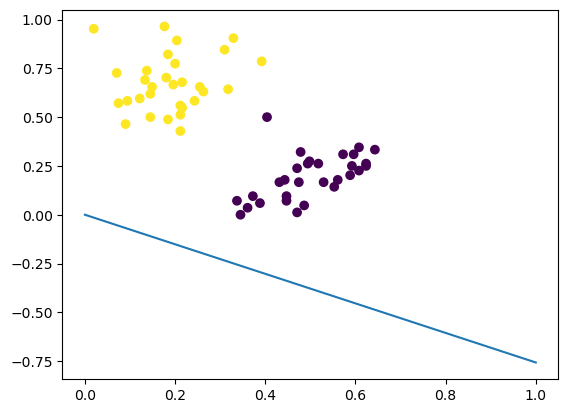

|> Truth Values for Training <|
   Training Accuracy:  50.0 %
     Real  Pred Match
0      1    -1   [ ]
1      1    -1   [ ]
2      1    -1   [ ]
3      1    -1   [ ]
4      1    -1   [ ]
5      1    -1   [ ]
6      1    -1   [ ]
7      1    -1   [ ]
8      1    -1   [ ]
9      1    -1   [ ]
10     1    -1   [ ]
11     1    -1   [ ]
12     1    -1   [ ]
13     1    -1   [ ]
14     1    -1   [ ]
15     1    -1   [ ]
16     1    -1   [ ]
17     1    -1   [ ]
18     1    -1   [ ]
19     1    -1   [ ]
20     1    -1   [ ]
21     1    -1   [ ]
22     1    -1   [ ]
23     1    -1   [ ]
24     1    -1   [ ]
25     1    -1   [ ]
26     1    -1   [ ]
27     1    -1   [ ]
28     1    -1   [ ]
29     1    -1   [ ]
30    -1    -1   [*]
31    -1    -1   [*]
32    -1    -1   [*]
33    -1    -1   [*]
34    -1    -1   [*]
35    -1    -1   [*]
36    -1    -1   [*]
37    -1    -1   [*]
38    -1    -1   [*]
39    -1    -1   [*]
40    -1    -1   [*]
41    -1    -1   [*]
42    -1    -1   [*]
43    -1    -

In [1]:
import os
import tkinter as tk
from tkinter import Canvas
from tkinter import messagebox
from tkinter import ttk

import numpy as np
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.figure import Figure

import Model
import preReq

---
### Input Part

In [2]:
Top = tk.Tk()
Top.title("Penguins-Classifier-Perceptron")
Top.geometry('1000x500')
Top.resizable(0, 0)

''

In [3]:
Input_lbl = tk.Label(Top, text='Input', font=('Times New Roman', 27), foreground="#a52a2a")
Input_lbl.place(x=130, y=1)

Output_lbl = tk.Label(Top, text='Output', font=('Times New Roman', 27), foreground="#a52a2a")
Output_lbl.place(x=630, y=1)

In [4]:
Feature1_lbl = tk.Label(Top, text='Select 1st Feature', font=('Verdana', 12), foreground="Blue")
Feature1_lbl.place(x=10, y=60)

Feature1 = ttk.Combobox(Top, width=15, font=('Verdana', 10))
Feature1['values'] = preReq.Features
Feature1.current()
Feature1.place(x=200, y=60)

Feature2_lbl = tk.Label(Top, text='Select 2nd Feature', font=('Verdana', 12), foreground="Blue")
Feature2_lbl.place(x=10, y=100)

Feature2 = ttk.Combobox(Top, width=15, font=('Verdana', 10))
Feature2['values'] = preReq.Features
Feature2.current()
Feature2.place(x=200, y=100)

In [5]:
Class1_lbl = tk.Label(Top, text='Select 1st Class', font=('Verdana', 12), foreground="Blue")
Class1_lbl.place(x=10, y=160)

Class1 = ttk.Combobox(Top, width=15, font=('Verdana', 10))
Class1['values'] = preReq.Classes
Class1.current()
Class1.place(x=200, y=160)

Class2_lbl = tk.Label(Top, text='Select 2nd Class', font=('Verdana', 12), foreground="Blue")
Class2_lbl.place(x=10, y=200)

Class2 = ttk.Combobox(Top, width=15, font=('Verdana', 10))
Class2['values'] = preReq.Classes
Class2.current()
Class2.place(x=200, y=200)

In [6]:
eta_lbl = tk.Label(Top, text='Enter eta value', font=('Verdana', 12), foreground="Blue")
eta_lbl.place(x=10, y=260)

eta = tk.Entry(Top, font=('Verdana', 10), foreground="Blue", width=10)
eta.place(x=200, y=260)

In [7]:
LMS_lbl = tk.Label(Top, text='Enter Threshold value', font=('Verdana', 12), foreground="Blue")
LMS_lbl.place(x=10, y=300)

LMS = tk.Entry(Top, font=('Verdana', 12), foreground="Blue", width=8)
LMS.place(x=200, y=300)

In [8]:
ebochs_lbl = tk.Label(Top, text='Enter no. of ebochs', font=('Verdana', 12), foreground="Blue")
ebochs_lbl.place(x=10, y=340)

ebochs = tk.Entry(Top, font=('Verdana', 10), foreground="Blue", width=10)
ebochs.place(x=200, y=340)

In [9]:
CheckBias = tk.IntVar()
Bias = tk.Checkbutton(Top, text="Bias", variable=CheckBias, onvalue=1, offvalue=0, font=('Verdana', 20, 'bold'),
                      foreground="Orange")
Bias.place(x=50, y=360)

In [10]:
def PredictFn():
    if (Feature1.get() == '') or (Feature2.get() == '') or (Class1.get() == '') or (Class2.get() == '') or (
            eta.get() == '') or (ebochs.get() == ''):
        messagebox.showerror(title="error", message="Insert the missing inputs", parent=Top)
    elif (Feature1.get() == Feature2.get()) or (Class1.get() == Class2.get()):
        messagebox.showerror(title="error", message="Don't reapet your choose", parent=Top)
    else:
        preReq.INarr[0] = Feature1.get()
        preReq.INarr[1] = Feature2.get()
        preReq.INarr[2] = Class1.get()
        preReq.INarr[3] = Class2.get()
        preReq.INarr[4] = abs(float(eta.get()))
        preReq.INarr[5] = abs(int(ebochs.get()))
        preReq.INarr[6] = CheckBias.get()
        preReq.INarr[7] = LMS.get()
        exec(open('Model.py').read())
        Top.destroy()


PredictBTN = tk.Button(Top, text="Run", font=('Verdana', 15, 'bold'), bg="green", foreground="yellow",
                       command=PredictFn)
PredictBTN.place(x=210, y=410)

In [11]:
def ExitFn():
    os._exit(1)


ExitBTN = tk.Button(Top, text="Exit", font=('Verdana', 15, 'bold'), bg="red", foreground="yellow", command=ExitFn)
ExitBTN.place(x=90, y=410)

In [12]:
canvas = Canvas(Top, width=5, height=500)
for x in range(5):
    canvas.create_line(x, 0, x, 500, fill="#a52a2a")
canvas.place(x=380, y=0)

In [13]:
Top.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "E:\Anconda\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Yossef\AppData\Local\Temp\ipykernel_8616\378714117.py", line 16, in PredictFn
    exec(open('Model.py').read())
  File "<string>", line 140, in <module>
  File "<string>", line 135, in PerceptronAlgo
NameError: name 'CalculateMSE' is not defined


---
### Output Part

In [14]:
Top = tk.Tk()
Top.title("Penguins-Classifier-Perceptron")
Top.geometry('1000x500')
Top.resizable(0, 0)

''

In [15]:
Input_lbl = tk.Label(Top, text='Input', font=('Times New Roman', 27), foreground="#a52a2a")
Input_lbl.place(x=130, y=1)

Output_lbl = tk.Label(Top, text='Output', font=('Times New Roman', 27), foreground="#a52a2a")
Output_lbl.place(x=630, y=1)

In [16]:
Feature1_lbl = tk.Label(Top, text='Select 1st Feature', font=('Verdana', 12), foreground="Blue")
Feature1_lbl.place(x=10, y=60)

Feature1 = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=16)
Feature1.configure(state='normal')
Feature1.insert('end', preReq.INarr[0])
Feature1.configure(state='disabled')
Feature1.place(x=200, y=60)

Feature2_lbl = tk.Label(Top, text='Select 2nd Feature', font=('Verdana', 12), foreground="Blue")
Feature2_lbl.place(x=10, y=100)

Feature2 = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=16)
Feature2.configure(state='normal')
Feature2.insert('end', preReq.INarr[1])
Feature2.configure(state='disabled')
Feature2.place(x=200, y=100)

In [17]:
Class1_lbl = tk.Label(Top, text='Select 1st Class', font=('Verdana', 12), foreground="Blue")
Class1_lbl.place(x=10, y=160)

Class1 = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=8)
Class1.configure(state='normal')
Class1.insert('end', preReq.INarr[2])
Class1.configure(state='disabled')
Class1.place(x=200, y=160)

Class2_lbl = tk.Label(Top, text='Select 2nd Class', font=('Verdana', 12), foreground="Blue")
Class2_lbl.place(x=10, y=200)

Class2 = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=8)
Class2.configure(state='normal')
Class2.insert('end', preReq.INarr[3])
Class2.configure(state='disabled')
Class2.place(x=200, y=200)

In [18]:
eta_lbl = tk.Label(Top, text='Enter eta value', font=('Verdana', 12), foreground="Blue")
eta_lbl.place(x=10, y=260)

eta = tk.Entry(Top, font=('Verdana', 12), foreground="Blue", width=8)
eta.configure(state='normal')
eta.insert('end', preReq.INarr[4])
eta.configure(state='disabled')
eta.place(x=200, y=260)

In [19]:
LMS_lbl = tk.Label(Top, text='Enter Threshold value', font=('Verdana', 12), foreground="Blue")
LMS_lbl.place(x=10, y=300)

LMS = tk.Entry(Top, font=('Verdana', 12), foreground="Blue", width=8)
LMS.configure(state='normal')
LMS.insert('end', preReq.INarr[7])
LMS.configure(state='disabled')
LMS.place(x=200, y=300)

In [20]:
ebochs_lbl = tk.Label(Top, text='Enter no. of ebochs', font=('Verdana', 12), foreground="Blue")
ebochs_lbl.place(x=10, y=340)

ebochs = tk.Entry(Top, font=('Verdana', 12), foreground="Blue", width=8)
ebochs.configure(state='normal')
ebochs.insert('end', preReq.INarr[5])
ebochs.configure(state='disabled')
ebochs.place(x=200, y=340)

In [21]:
CheckBias = tk.IntVar()
Bias = tk.Checkbutton(Top, text="Bias", variable=CheckBias, onvalue=1, offvalue=0, font=('Verdana', 20, 'bold'),
                      foreground="Orange")
if preReq.INarr[6]:
    Bias.select()
Bias.configure(state='disabled')
Bias.place(x=50, y=360)

In [22]:
ExitBTN = tk.Button(Top, text="Exit", font=('Verdana', 15, 'bold'), bg="red", foreground="yellow", command=ExitFn)
ExitBTN.place(x=150, y=410)

In [23]:
canvas = Canvas(Top, width=5, height=500)
for x in range(5):
    canvas.create_line(x, 0, x, 500, fill="#a52a2a")
canvas.place(x=380, y=0)

In [24]:
pClass_lbl = tk.Label(Top, text='Predicted :', font=('Verdana', 12), foreground="orange")
pClass_lbl.place(x=450, y=60)

pClass = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=10)
pClass.configure(state='normal')
pClass.insert('end', preReq.OUTarr[0])
pClass.configure(state='disabled')
pClass.place(x=550, y=60)

In [25]:
trainAcc_lbl = tk.Label(Top, text='Train Acc :', font=('Verdana', 12), foreground="orange")
trainAcc_lbl.place(x=680, y=60)

trainAcc = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=10)
trainAcc.configure(state='normal')
trainAcc.insert('end', (preReq.OUTarr[1], '%'))
trainAcc.configure(state='disabled')
trainAcc.place(x=780, y=60)

In [26]:
testAcc_lbl = tk.Label(Top, text='Test  Acc : ', font=('Verdana', 12), foreground="orange")
testAcc_lbl.place(x=680, y=100)

testAcc = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=10)
testAcc.configure(state='normal')
testAcc.insert('end', (preReq.OUTarr[2], '%'))
testAcc.configure(state='disabled')
testAcc.place(x=780, y=100)

In [27]:
confMat_lbl = tk.Label(Top, text='Confusion\nMatrix', font=('Verdana', 12), foreground="orange")
confMat_lbl.place(x=450, y=100)

confMat0 = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=4)
confMat0.configure(state='normal')
confMat0.insert('end', (preReq.OUTarr[3][0]))
confMat0.configure(state='disabled')
confMat0.place(x=540, y=100)

confMat1 = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=4)
confMat1.configure(state='normal')
confMat1.insert('end', (preReq.OUTarr[3][1]))
confMat1.configure(state='disabled')
confMat1.place(x=580, y=100)

confMat2 = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=4)
confMat2.configure(state='normal')
confMat2.insert('end', (preReq.OUTarr[3][2]))
confMat2.configure(state='disabled')
confMat2.place(x=540, y=120)

confMat3 = tk.Entry(Top, font=('Verdana', 12), foreground="green", width=4)
confMat3.configure(state='normal')
confMat3.insert('end', (preReq.OUTarr[3][3]))
confMat3.configure(state='disabled')
confMat3.place(x=580, y=120)

In [28]:
f = Figure(figsize=(3, 3), dpi=100)
a = f.add_subplot(111)
a.scatter(x=Model.train_data[:, :1], y=Model.train_data[:, 1:2], c=Model.train_target)
a.plot(np.array([0, 1]), np.array([(-Model.bias) / Model.weight[1], (-Model.weight[0] - Model.bias) / Model.weight[1]]))

f = Figure(figsize=(3, 3), dpi=100)
a = f.add_subplot(111)
a.scatter(x=Model.test_data[:, :1], y=Model.test_data[:, 1:2], c=Model.test_target)
a.plot(np.array([0, 1]), np.array([(-Model.bias) / Model.weight[1], (-Model.weight[0] - Model.bias) / Model.weight[1]]))

In [29]:
canvas = FigureCanvasTkAgg(f, master=Top)
canvas.draw()
canvas.get_tk_widget().pack()
toolbar = NavigationToolbar2Tk(canvas, Top)
toolbar.update()
canvas._tkcanvas.place(x=530, y=160)

In [ ]:
Top.mainloop()